# Activity
1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.
2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.
3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as follows: segmented_clock

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

Activity 1

In [ ]:
img = cv.imread("images/pineapple.jfif", 0)

if img is None:
    sys.exit("No img found")
    
aperture_size = 3
# Sobel
sobel_x = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=aperture_size)
sobel_x = cv.convertScaleAbs(sobel_x)

sobel_y = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=aperture_size)
sobel_y = cv.convertScaleAbs(sobel_y)

# Laplacian
laplacian = cv.Laplacian(img, cv.CV_32F, ksize=aperture_size)

# Prewitt
prewitt_x = cv.filter2D(img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv.filter2D(img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Scharr
scharr_x = cv.Scharr(img, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_32F, 0, 1)

# Canny
canny = cv.Canny(img, 100, 200, apertureSize=aperture_size)

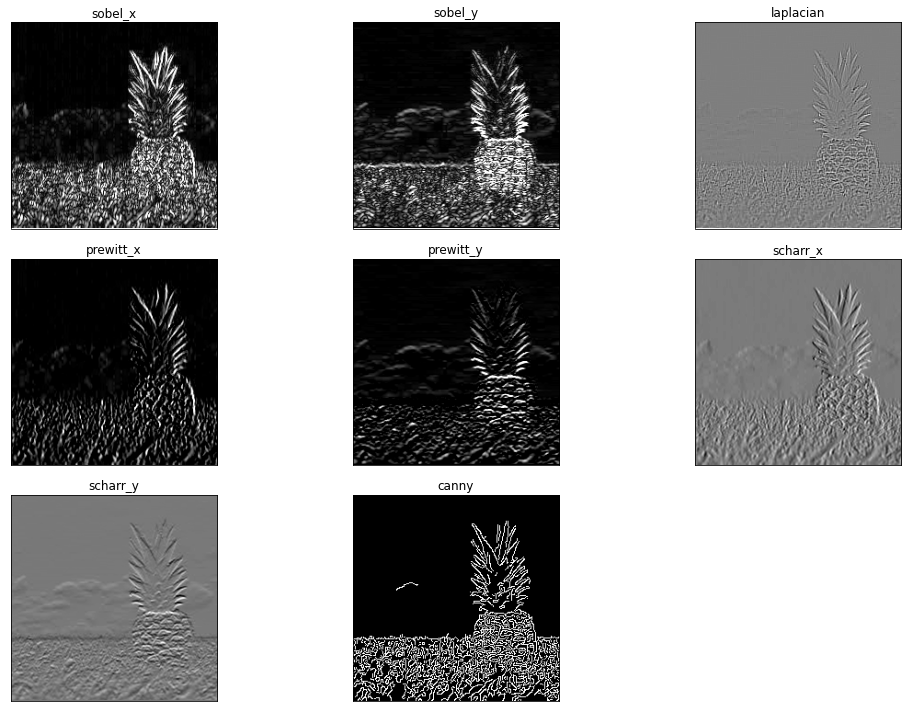

In [37]:
# display
plt.figure(figsize=(15, 10))

# edges are emphasized in the image. Sobel x for vertical edges and Sobe y for horizontal edges
plt.subplot(331), plt_img(sobel_x, "sobel_x")
plt.subplot(332), plt_img(sobel_y, "sobel_y")

# sharp changes in gradient will be emphasized (ie the edges). Stronger edges are more prominent
plt.subplot(333), plt_img(laplacian, "laplacian")

# Detected eges are not prominent and not as good as sobel
plt.subplot(334), plt_img(prewitt_x, "prewitt_x")
plt.subplot(335), plt_img(prewitt_y, "prewitt_y")

# Detect sharp edges and looks cleaner than the above edge detection
plt.subplot(336), plt_img(scharr_x, "scharr_x")
plt.subplot(337), plt_img(scharr_y, "scharr_y")

# Able to detect many edges, including the grass
plt.subplot(338), plt_img(canny, "canny")

plt.tight_layout()
plt.show()

Activity 2

In [172]:
img = cv.imread("images/electronic.jfif")

mask = cv.Canny(img, 200, 300)

contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

min_peri = 500
for cnt in contours:
    peri = cv.arcLength(cnt, False)
    if peri > min_peri:
        x, y, w, h = cv.boundingRect(cnt)
        cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

show_img("detected laptop", img)

Activity 3

In [36]:
img = cv.imread("images/clock.jpg")

blur = cv.GaussianBlur(img, (5, 5), 0)
mask = cv.Canny(blur, 200, 300)

contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

min_area = 300
max_area = 500
for cnt in contours:
    area = cv.arcLength(cnt, True)
    if area > min_area and area < max_area:
        cv.drawContours(img, cnt, -1, (0, 0, 255), 3)
        
cv.imshow("s", mask)
show_img("segmented_clock", img)